In [2]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Cargar los datos de entrenamiento y prueba
X_train = pd.read_csv("../data/data_Train_Test/X_train.csv")
X_test = pd.read_csv("../data/data_Train_Test/X_test.csv")
y_train = pd.read_csv("../data/data_Train_Test/y_train.csv")['Puntaje_Credito']
y_test = pd.read_csv("../data/data_Train_Test/y_test.csv")['Puntaje_Credito']

# Normalizar los datos (importante para redes neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo MLP
model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Una capa oculta con 100 neuronas
    activation='relu',          # Función de activación ReLU
    solver='adam',              # Optimizador Adam
    max_iter=500,               # Número máximo de iteraciones
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7293332234402043

Classification Report:
               precision    recall  f1-score   support

        Good       0.66      0.61      0.63      1656
        Poor       0.72      0.74      0.73      4140
    Standard       0.75      0.76      0.75      6337

    accuracy                           0.73     12133
   macro avg       0.71      0.70      0.71     12133
weighted avg       0.73      0.73      0.73     12133



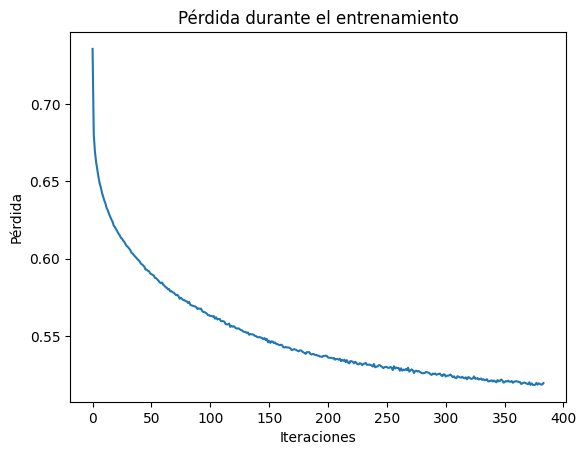

In [4]:
plt.plot(model.loss_curve_)
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()